# Topic:- Time Series Analysis on Real Estate Data 

## This goal of this project is to predict the prices of the house in time by evaluating Real estate data 

## Dataset Description 
### In this dataset, there are 2898 observations with 7 columns and 414 rows with no of parameters below which are the major reasons for people to buy house at the particualr area 
#### X2 house age:- It is the age of the houses in that particular area 
#### X3 distance to the nearest MRT station:- (MASS rapit transit), so that it is convient for people in the locality as it saves the time to reach for a metro 
#### X4 number of convenience store:- Which is a very important factor for working people, as this will be handy enough for them to buy stuff anytime
#### X5 latitide:- Geographical measure of the house
#### X6 logitude:- Geographical measure of the house
#### Y house price per unit area:- This is the area value of the house per unit, the unit of calculation is based on per square foot per month and for a particular location, street, and multiplied by a rate 


## Loading the required Libraries and the data 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Real estate.csv')

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


## Checking the missing values of the data 

In [5]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

## Analysing the data by its shape, information, discription and some ploting 

In [6]:
df.shape

(414, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
df['year']=df['X1 transaction date']
df.drop(columns=['X1 transaction date'],inplace=True)
df.drop(columns=['No'],inplace=True)

In [9]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012.917
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012.917
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013.583
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013.500
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012.833


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
 6   year                                    414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [11]:
df['year']=pd.to_datetime(df['year'],format='%y%m%d')

In [12]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2020-01-02
1,19.5,306.59470,9,24.98034,121.53951,42.2,2020-01-02
2,13.3,561.98450,5,24.98746,121.54391,47.3,2020-01-03
3,13.3,561.98450,5,24.98746,121.54391,54.8,2020-01-03
4,5.0,390.56840,5,24.97937,121.54245,43.1,2020-01-02


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   X2 house age                            414 non-null    float64       
 1   X3 distance to the nearest MRT station  414 non-null    float64       
 2   X4 number of convenience stores         414 non-null    int64         
 3   X5 latitude                             414 non-null    float64       
 4   X6 longitude                            414 non-null    float64       
 5   Y house price of unit area              414 non-null    float64       
 6   year                                    414 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 22.8 KB


In [14]:
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Visuaization 

In [1]:
from autoviz.AutoViz_Class import AutoViz_Class

AV= AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (414, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


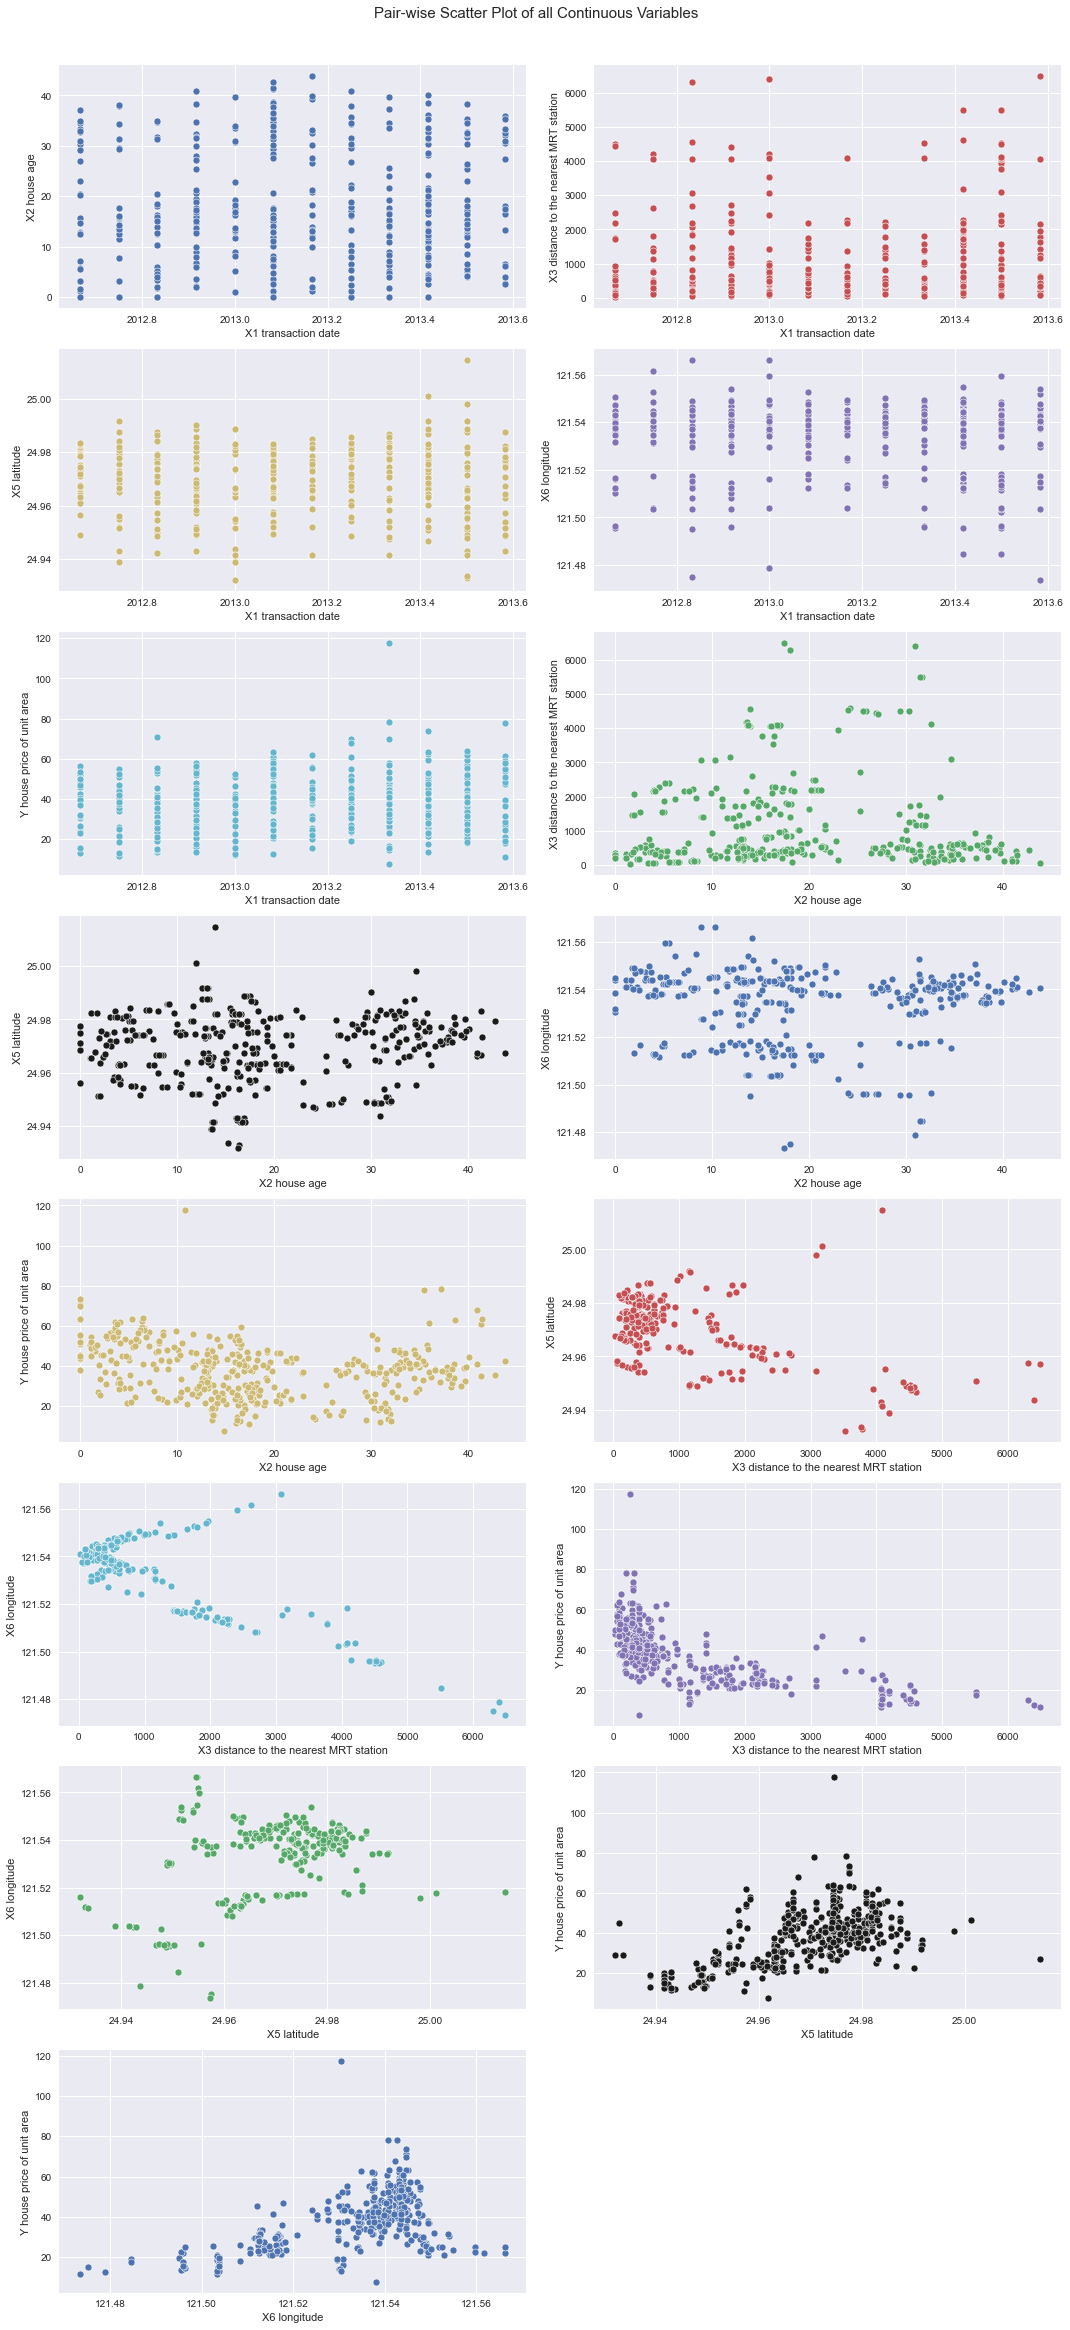

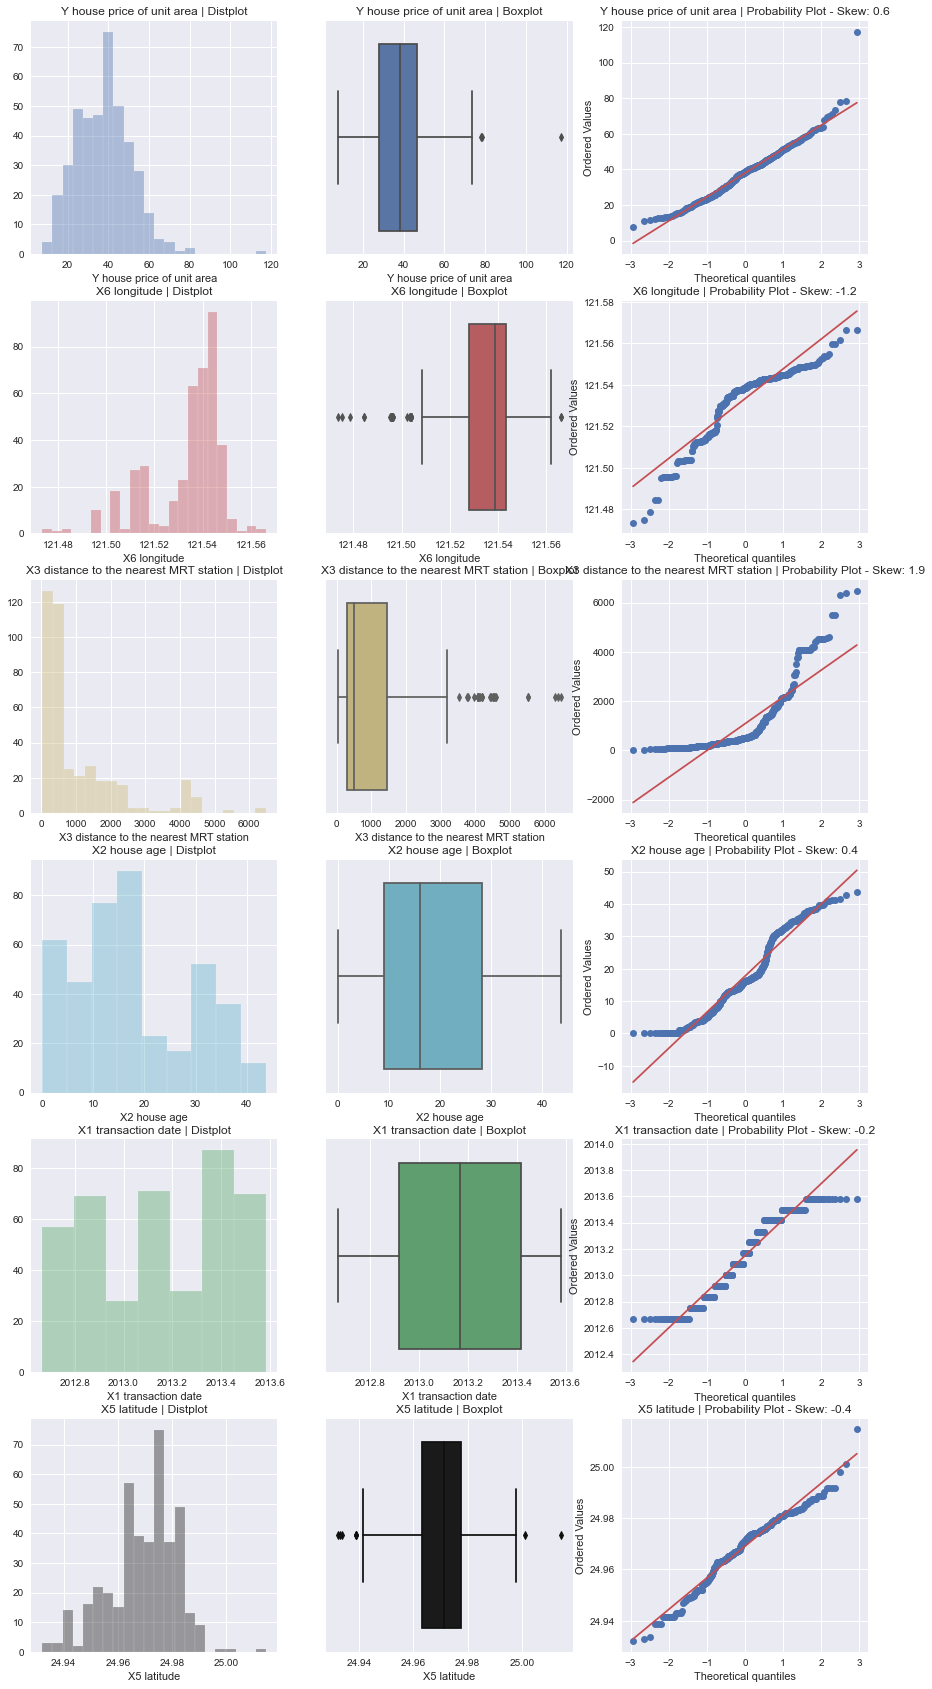

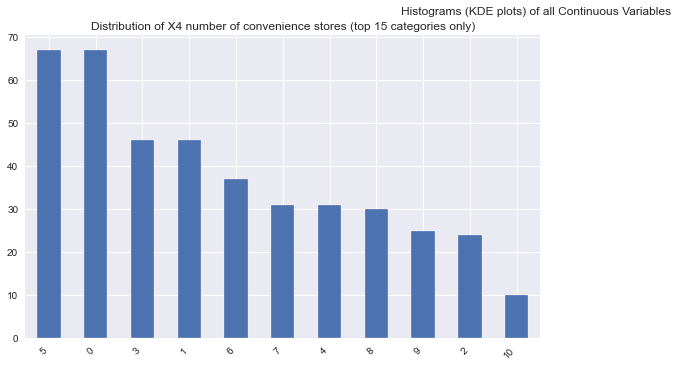

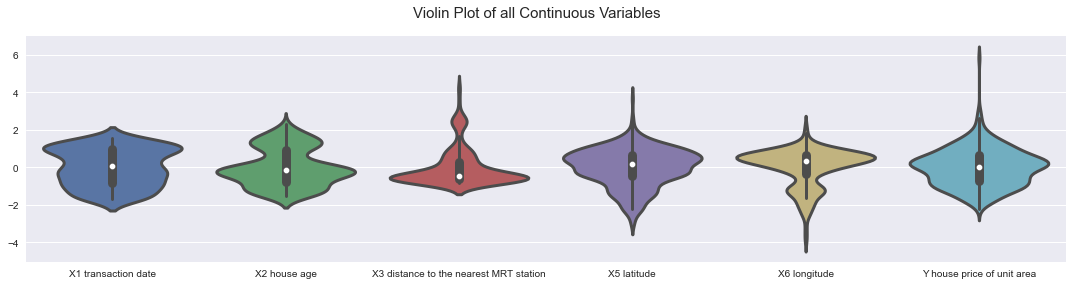

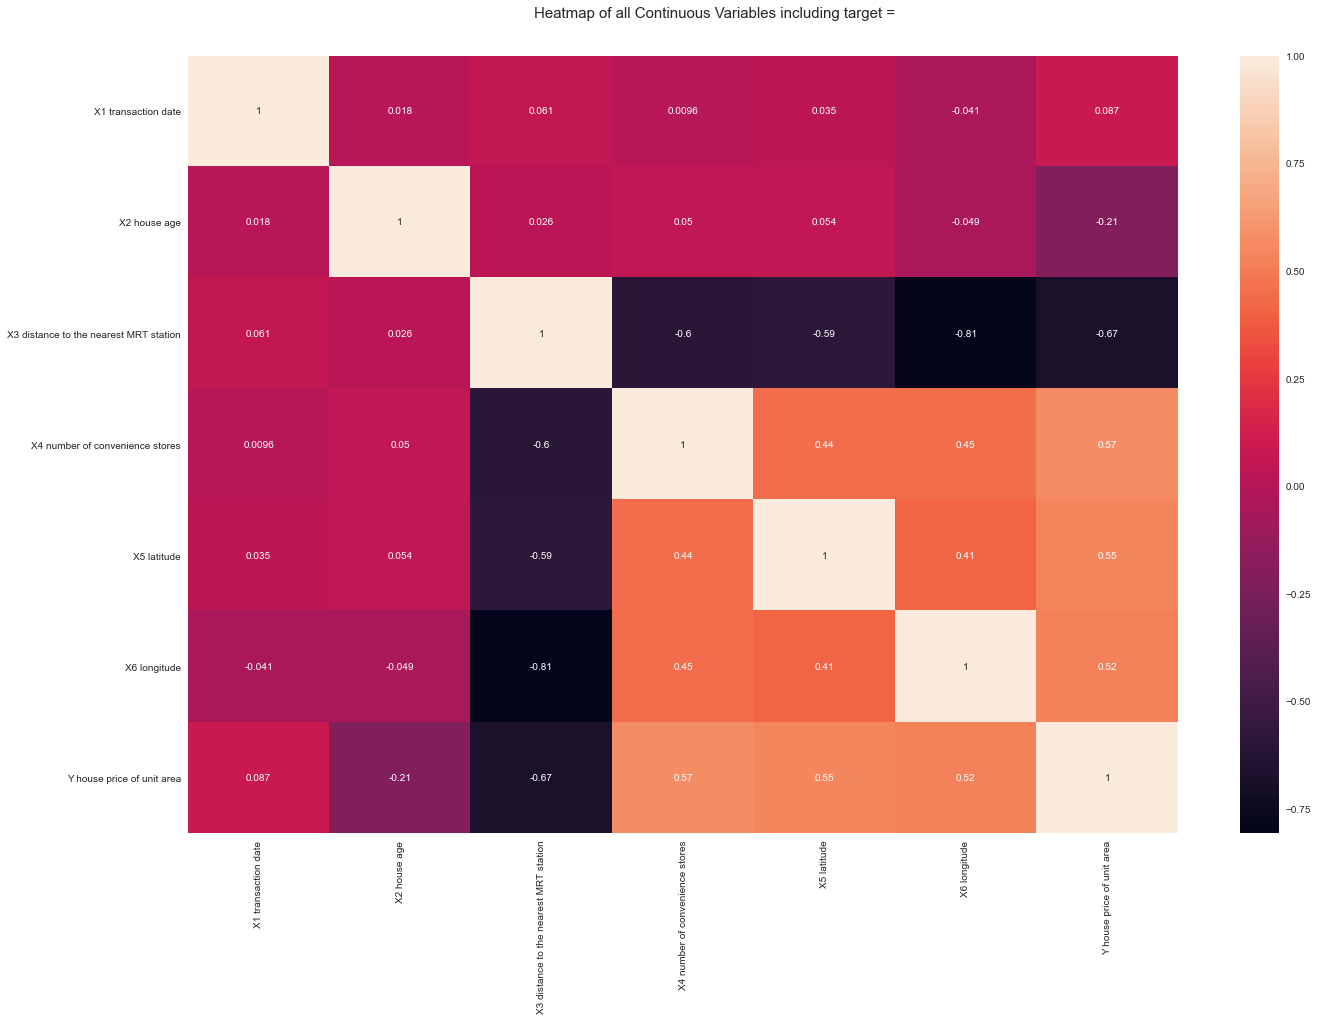

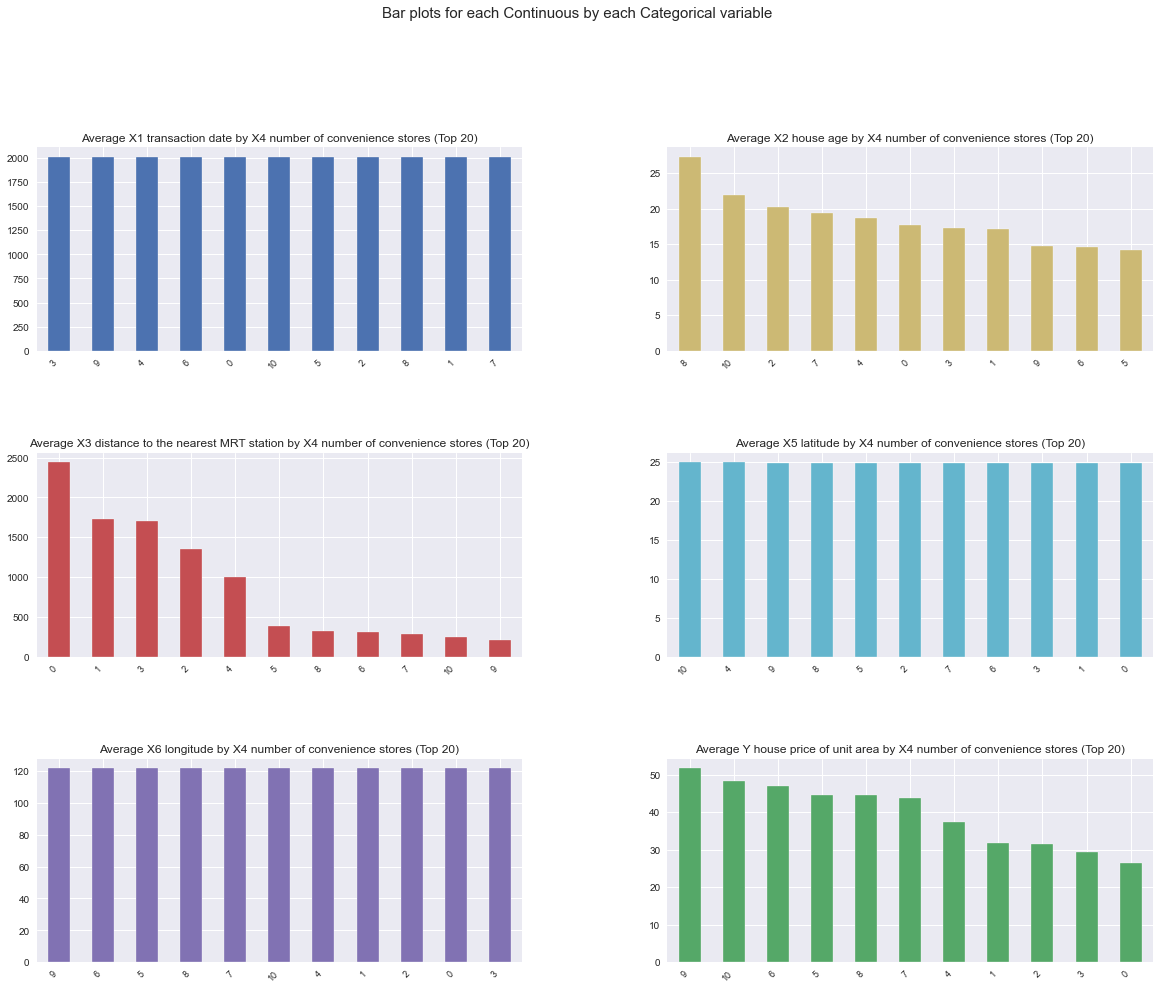

Time to run AutoViz (in seconds) = 23.069

 ###################### VISUALIZATION Completed ########################


In [2]:
filename='Real estate.csv'
sep=","
dft= AV.AutoViz( filename,sep=",",depVar="",dfte=None, header=0,verbose=0,lowess=False,chart_format="svg",max_rows_analyzed=150000, max_cols_analyzed=30)

## Selecting required columns to predict using time series 

In [26]:
df1=df.iloc[:,[6,5]]
df1

,year,Y house price of unit area
0,2020-01-02,37.9
1,2020-01-02,42.2
2,2020-01-03,47.3
3,2020-01-03,54.8
4,2020-01-02,43.1
...,...,...
409,2020-01-03,15.4
410,2020-01-02,50.0
411,2020-01-03,40.6
412,2020-01-03,52.5


In [27]:
df1.describe()

,Y house price of unit area
count,414.000000
mean,37.980193
std,13.606488
min,7.600000
25%,27.700000
50%,38.450000
75%,46.600000
max,117.500000


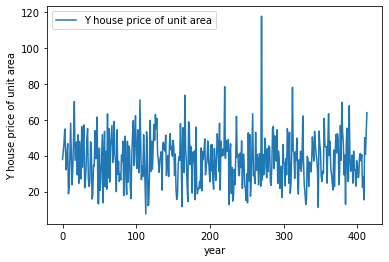

In [34]:
sns.lineplot(data=df1)
plt.xlabel('year')
plt.ylabel('Y house price of unit area')
plt.show()


### Testing for Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df["Y house price of unit area"].dropna())
pval=res[1]
if pval>0.05:
    print("Non Stationary")
else:
    print("Stationary")

Stationary


### Since the data is Sationary now to fit the model import auto_arima

In [30]:
from pmdarima import auto_arima 

In [35]:
auto_model=auto_arima(df["Y house price of unit area"].dropna(), Trace=True)

In [36]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  414
Model:                        SARIMAX   Log Likelihood               -1667.706
Date:                Sat, 01 May 2021   AIC                           3339.413
Time:                        12:05:34   BIC                           3347.464
Sample:                             0   HQIC                          3342.597
                                - 414                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     37.9802      0.699     54.354      0.000      36.611      39.350
sigma2       184.6893      9.336     19.783      0.000     166.391     202.987
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               103.53
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.60
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
from statsmodels.tsa.arima_model import ARIMA 

In [38]:
#train and test 
X=df["Y house price of unit area"].dropna()

In [39]:
X.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [40]:
X.shape

(414,)

In [41]:
data_len=int (0.7*(len(X)))
data_len

289

In [42]:
train=X[:data_len]
train.shape

(289,)

In [43]:
test=X[data_len:]
test.shape

(125,)

<AxesSubplot:>

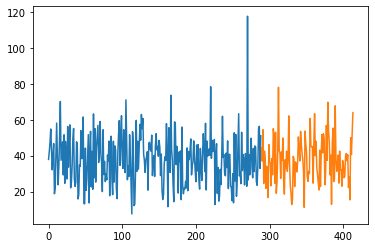

In [44]:
train.plot()
test.plot()

### p: The order of the auto-regressive (AR) model (i.e., the number of lag observations). A time series is     considered AR when previous values in the time series are very predictive of later values. An AR process will show a very gradual decrease in the ACF plot.
### d: The degree of differencing.
### q: The order of the moving average (MA) model. This is essentially the size of the “window” function over your time series data. An MA process is a linear combination of past errors.

#### Here in our model we take p,d,q as 1,0,5 simultaneusly 

In [45]:
model=ARIMA(train,order=(1,0,5))
model_fit=model.fit()
model_fit.summary()

C:\Users\manisha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  ARMA Model Results                                  
======================================================================================
Dep. Variable:     Y house price of unit area   No. Observations:                  289
Model:                             ARMA(1, 5)   Log Likelihood               -1170.256
Method:                               css-mle   S.D. of innovations             13.877
Date:                        Sat, 01 May 2021   AIC                           2356.513
Time:                                12:07:32   BIC                           2385.844
Sample:                                     0   HQIC                          2368.265
                                                                                      
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               38.1848      0.958     39.869      0.000      36.308      40.062
ar.L1.Y house price of unit area     0.0160      0.551      0.029      0.977      -1.064       1.096
ma.L1.Y house price of unit area    -0.0355      0.548     -0.065      0.948      -1.110       1.039
ma.L2.Y house price of unit area    -0.0016      0.060     -0.027      0.978      -0.119       0.115
ma.L3.Y house price of unit area     0.0312      0.058      0.535      0.593      -0.083       0.146
ma.L4.Y house price of unit area     0.0601      0.060      0.999      0.318      -0.058       0.178
ma.L5.Y house price of unit area     0.1026      0.065      1.582      0.114      -0.024       0.230
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           62.6493           +0.0000j           62.6493            0.0000
MA.1            1.1396           -0.9167j            1.4625           -0.1078
MA.2            1.1396           +0.9167j            1.4625            0.1078
MA.3           -1.6842           -0.0000j            1.6842           -0.5000
MA.4           -0.5906           -1.5356j            1.6453           -0.3084
MA.5           -0.5906           +1.5356j            1.6453            0.3084
-----------------------------------------------------------------------------
"""

In [46]:
ypred_train=model_fit.predict()

### The predicted values of trained y are:-

In [47]:
ypred_train

0      38.184842
1      38.187983
2      38.140443
3      38.079365
4      38.084472
         ...    
284    38.457888
285    39.120879
286    37.482521
287    35.545463
288    36.849639
Length: 289, dtype: float64

In [48]:
ypred_test=model_fit.predict(start=len(train),end=(len(X)-1))

## The values of Mean Absolute Error, Mean Square Error, and Root Mean Square Error

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(test,ypred_test))
print("MSE:",mean_squared_error(test,ypred_test))
print("RMSE:",np.sqrt(mean_squared_error(test,ypred_test)))

MAE: 9.951468727562812
MSE: 159.7373774261404
RMSE: 12.638725308595816


In [50]:
ypred_test

289    39.035426
290    40.883143
291    40.440446
292    38.800022
293    39.645824
         ...    
409    38.184842
410    38.184842
411    38.184842
412    38.184842
413    38.184842
Length: 125, dtype: float64

In [51]:
test

289    44.5
290    37.0
291    54.4
292    24.5
293    42.5
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 125, dtype: float64

In [75]:
"2020-01-02", "2021-5-05" #test the date start date end date

('2020-01-02', '2021-5-05')

## So the predicted test value of the given date above are:-

In [76]:
test_dates=pd.date_range(start='2020-01-02',end='2020-5-05') 
test_dates

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
               '2020-05-04', '2020-05-05'],
              dtype='datetime64[ns]', length=125, freq='D')

In [77]:
ypred_test.index=test_dates
ypred_test

2020-01-02    39.035426
2020-01-03    40.883143
2020-01-04    40.440446
2020-01-05    38.800022
2020-01-06    39.645824
                ...    
2020-05-01    38.184842
2020-05-02    38.184842
2020-05-03    38.184842
2020-05-04    38.184842
2020-05-05    38.184842
Freq: D, Length: 125, dtype: float64

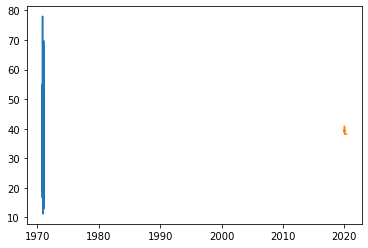

In [78]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(ypred_test)

## For new range of dates we fit the model and we gets the new values.

In [ ]:
new_date_range=pd.date_range(start="2020-5-05",end="2020-6-03")
new_date_range

In [106]:
model=ARIMA(X,order=(1,0,5))
model_fit=model.fit()

C:\Users\manisha\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [107]:
new_pred=model_fit.predict(start=len(X),end=len(X)+29)

In [108]:
len(new_pred),len(new_date_range)

(30, 30)

In [109]:
new_pred.index=new_date_range

In [110]:
new_pred

2020-05-05    37.211227
2020-05-06    38.435847
2020-05-07    38.795877
2020-05-08    38.970662
2020-05-09    39.602325
2020-05-10    38.506089
2020-05-11    38.158193
2020-05-12    38.047787
2020-05-13    38.012749
2020-05-14    38.001629
2020-05-15    37.998100
2020-05-16    37.996980
2020-05-17    37.996625
2020-05-18    37.996512
2020-05-19    37.996476
2020-05-20    37.996465
2020-05-21    37.996462
2020-05-22    37.996460
2020-05-23    37.996460
2020-05-24    37.996460
2020-05-25    37.996460
2020-05-26    37.996460
2020-05-27    37.996460
2020-05-28    37.996460
2020-05-29    37.996460
2020-05-30    37.996460
2020-05-31    37.996460
2020-06-01    37.996460
2020-06-02    37.996460
2020-06-03    37.996460
Freq: D, dtype: float64

# Conclusion - 
### The values of new predictions and the prediction of the values in the data has not much of a difference, it varies in 2.7 to 3.5 of the price per unit area. As we can se the new predicted values the value is decreased by this values at the end.The main reason for this is as the houses at the distance the houses is far from the MTR stations less is the price of the house per unit area. 